# 马尔可夫链蒙特卡洛方法

蒙特卡洛法（Monte Carlo method) ， 也称为统计模拟方法 (statistical simulation method) ， 是通过从概率模型的随机抽样进行近似数值计

算的方法。 马尔可夫链陟特卡罗法 (Markov Chain Monte Carlo, MCMC)， 则是以马尔可夫链 (Markov chain）为概率模型的蒙特卡洛法。

马尔可夫链蒙特卡罗法构建一个马尔可夫链，使其平稳分布就是要进行抽样的分布， 首先基于该马尔可夫链进行随机游走， 产生样本的序列，

之后使用该平稳分布的样本进行近似数值计算。

Metropolis-Hastings算法是最基本的马尔可夫链蒙特卡罗法，Metropolis等人在 1953年提出原始的算法，Hastings在1970年对之加以推广，

形成了现在的形式。吉布斯抽样(Gibbs sampling)是更简单、使用更广泛的马尔可夫链蒙特卡罗法，1984 年由S. Geman和D. Geman提出。

马尔可夫链蒙特卡罗法被应用于概率分布的估计、定积分的近似计算、最优化问题的近似求解等问题，特别是被应用于统计学习中概率模型的学习

与推理，是重要的统计学习计算方法。

一般的蒙特卡罗法有**直接抽样法**、** 接受-拒绝抽样法**、 **重要性抽样法**等。

接受-拒绝抽样法、重要性抽样法适合于概率密度函数复杂 （如密度函数含有多个变量，各变量相互不独立，密度函数形式复杂），不能直接抽样的情况。

### 19.1.2 数学期望估计

一舣的蒙特卡罗法， 如直接抽样法、接受·拒绝抽样法、重要性抽样法， 也可以用于数学期望估计 （estimation Of mathematical expectation)。

假设有随机变量$x$， 取值 $x\in X$, 其概率密度函数为 $p(x)$, $f(x)$ 为定义在 $X$ 上的函数， 目标是求函数 $f(x)$ 关于密度函数 $p(x)$ 的数学期望 $E_{p(x)}[f(x)]$。


针对这个问题，蒙特卡罗法按照概率分布 $p(x)$ 独立地抽取 $n$ 个样本$x_{1}, x_{2},...,x_{n}$，比如用以上的抽样方法，之后计算函

数$f(x)$的样本均值$\hat f_{n}$  

$\hat f_{n} = \frac{1} {n}\sum_{i=1}^{n}f(x_{i})$


作为数学期望$E_{p(x)}[f(x)]$近似值。

根据大数定律可知， 当样本容量增大时， 样本均值以概率1收敛于数学期望：  

$\hat f_{n} \rightarrow E_{p(x)}[f(x)], n \rightarrow \infty $

这样就得到了数学期望的近似计算方法：  

$E_{p(x)}[f(x)] \approx \frac{1} {n}\sum_{i=1}^{n}f(x_{i})$

### 马尔可夫链 

考虑一个随机变量的序列 $X = {X_{0}, X_{1},..., X(t),...}$ 这里 $X_{t}$，表示时刻 $t$ 的随机变量， $t = 0, 1, 2...$. 

每个随机变量 $X_{t}(t=0,1,2,...)$ 的取值集合相同， 称为状态空间， 表示为$S$.  随机变量可以是离散的， 也可以是连续的。

以上随机变量的序列构成随机过程（stochastic process)。

假设在时刻 $0$ 的随机变量 $X_{0}$ 遵循概率分布 $P(X_{0}) = \pi$，称为初始状态分布。在某个时刻 $t>=1$ 的随机变量 $X_{t}$与前

一个时刻的随机变量 $X_{t-1}$ 之间有条件分布 $P(X_{t}|X_{t-1})$ 如果 $X_{t}$ 只依赖于 $X_{t-1}$, 而不依赖于过去的随机变量 

${X_{0}，X_{1},...，X_{t-2}}$ 这一性质称为马尔可夫性，即  

$P(X_{t}|X_{0},X_{1},...,X_{t-1}) = P(X_{t}|X_{t-1}), t=1,2,...$

具有马尔可夫性的随机序列$X = {X_{0}, X_{1},..., X(t),...}$称为马尔可夫链， 或马尔可夫过程（Markov process)。 条件概率分布 

$P(X_{t}|X_{t-1})$ 称为**马尔可夫链的转移概率分布**。 **转移概率分布决定了马尔可夫裢的特性**。


#### 平稳分布  

设有马尔可夫链$X = {X_{0}, X_{1},..., X(t),...}$，其状态空间为 $S$,转移概率矩阵为 $P=(p_{ij})$， 如果存在状态空间 $S$ 上的一个分布  

$\pi = \begin{bmatrix}
\pi_{1}\\ 
\pi_{2}\\ 
\vdots \end{bmatrix}$

使得  

$\pi = P\pi$

则称丌为马尔可夫裢$X = {X_{0}, X_{1},..., X(t),...}$的平稳分布。


直观上，如果马尔可夫链的平稳分布存在，那么以该平稳分布作为初始分布，面向未来进行随机状态转移，之后任何一个时刻的状态分布都是该平稳分布。

**引理19．1**

给定一个马尔可夫链$X = {X_{0}, X_{1},..., X(t),...}$, 状态空间为$S$, 移概率矩阵为$P=(p_{ij})$， 则分布 $\pi=(\pi_{1}, \pi_{2},...)^{T}$ 为 $X$ 的平稳分布的充要条件是$\pi=(\pi_{1}, \pi_{2},...)^{T}$是下列方程组的解：

$x_{i} = \sum_{j}p_{ij}x_{j}, i=1,2,...$  

$x_{i} >= 0, i = 1,2,...$  

$\sum_{i}x_{i} = 1$  


### 吉布斯采样

输入： 目标概率分布的密度函数$p(x)$, 函数$f(x)$;

输出： $p(x)$的随机样本 $x_{m+1}, x_{m+2}, ..., x_{n}$，函数样本均值 $f_{mn}$;

参数： 收敛步数$m$, 迭代步数 $n$.


1. 初始化。给出初始样本 $x^{0} = $($x^{0}_{1}, x^{0}_{2},..., x^{0}_{k}$)$^{T}$.

2. 对$i$循环执行  
 设第$i-1$次迭代结束前的样本为$x^{i-1} = $($x^{i-1}_{1}, x^{i-1}_{2},..., x^{i-1}_{k}$)$^{T}$，则第$i$次迭代进行如下几步操作：  

 + (1)由满条件分布 $p(x_{1}|x^{i-1}_{2},...,x^{i-1}_{k})$ 抽取 $x^{i}_{1}$  
 
 + ...
 
 + (j)由满条件分布 $p(x_{j}|x^{i}_{1},...,x^{i}_{j-1}, x^{i-1}_{j+1},..., x^{i-1}_{k})$ 抽取 $x^{i}_{j}$   
 
 + (k)由满条件分布 $p(x_{k}|x^{i}_{1},...,x^{i}_{k})$ 抽取 $x^{i}_{k}$ 
 
得到第 $i$ 次迭代值 $x^{(i)} = (x^{(i)}_{1}, x^{(i)}_{2},..., x^{(i)}_{k})^{T}$.


 3. 得到样本集合
    
 {$x^{(m+1)}, x^{(m+2)},..., x^{(n)}$}
 
 4. 计算
 
 $f_{mn} = \frac{1}{n-m}\sum_{i=m+1}^{n}f(x^{(i)})$

--------------------------------------------------------------------------------------------------------------------------------

#### 网络资源：

LDA-math-MCMC 和 Gibbs Sampling： https://cosx.org/2013/01/lda-math-mcmc-and-gibbs-sampling  

MCMC蒙特卡罗方法： https://www.cnblogs.com/pinard/p/6625739.html

In [45]:
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

transfer_matrix = np.array([[0.65,0.28,0.07],[0.15,0.67,0.18],[0.12,0.36,0.52]],dtype='float32')
start_matrix = np.array([[0.1,0.2,0.7]],dtype='float32')

value1 = []
value2 = []
value3 = []

for i in range(1):
    start_matrix = np.dot(start_matrix,transfer_matrix)
    value1.append(start_matrix[0][0])
    value2.append(start_matrix[0][1])
    value3.append(start_matrix[0][2])
print(start_matrix)


[[0.17899999 0.414      0.40699998]]


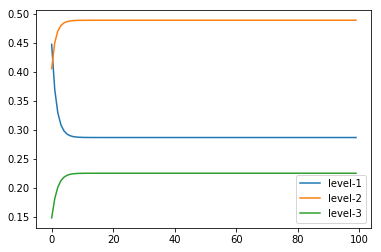

In [41]:
#进行可视化
x = np.arange(100)
plt.plot(x,value1,label='level-1')
plt.plot(x,value2,label='level-2')
plt.plot(x,value3,label='level-3')
plt.legend()
plt.show()

可以发现，从10轮左右开始，我们的状态概率分布就不变了，一直保持在  
[0.23076934,0.30769244,0.4615386]

### https://zhuanlan.zhihu.com/p/37121528

#### M-H采样python实现  
https://zhuanlan.zhihu.com/p/37121528

假设目标平稳分布是一个均值3，标准差2的正态分布，而选择的马尔可夫链状态转移矩阵 $Q(i,j)$ 的条件转移概率是以 $i$ 为均值,方差1的正态分布在位置 $j$ 的值。

2.9289333601720444


K:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


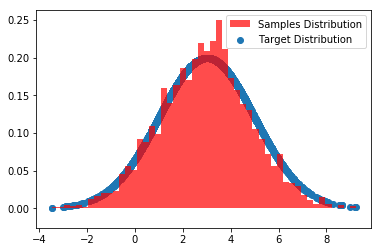

In [27]:
from scipy.stats import norm

def norm_dist_prob(theta):
    y = norm.pdf(theta, loc=3, scale=2)
    return y

T = 5000
pi = [0 for i in range(T)]
sigma = 1
t = 0
while t < T-1:
    t = t + 1
    pi_star = norm.rvs(loc=pi[t - 1], scale=sigma, size=1, random_state=None)   #状态转移进行随机抽样
    alpha = min(1, (norm_dist_prob(pi_star[0]) / norm_dist_prob(pi[t - 1])))   #alpha值

    u = random.uniform(0, 1)
    if u < alpha:
        pi[t] = pi_star[0]
    else:
        pi[t] = pi[t - 1]


plt.scatter(pi, norm.pdf(pi, loc=3, scale=2),label='Target Distribution')
num_bins = 50
print(sum(pi)/4999)
plt.hist(pi, num_bins, normed=1, facecolor='red', alpha=0.7,label='Samples Distribution')
plt.legend()
plt.show()

#### 二维Gibbs采样实例python实现  

假设我们要采样的是一个二维正态分布 $N(\mu, \Sigma)$ ，其中： $\mu=(\mu_{1}, \mu_{2})= (5, -1)$ , $\Sigma = \begin{pmatrix}
\sigma^{2}_{1} &   \rho \sigma_{1}\sigma_{2}b\rho \sigma_{2}& 
\sigma^{2}_{2}\end{pmatrix} = \begin{pmatrix}
 1& 1b1 & 
4\end{pmatrix}$;

而采样过程中的需要的状态转移条件分布为：

$P(x_{1}|x_{2}) = N(\mu_{1}+ \rho \sigma_{1}/\sigma_{2}(x_{2} - \mu_{2}), (1 - \rho^{2})\sigma^{2}_{1})$

$P(x_{2}|x_{1}) = N(\mu_{2}+ \rho \sigma_{2}/\sigma_{1}(x_{1} - \mu_{1}), (1 - \rho^{2})\sigma^{2}_{2})$

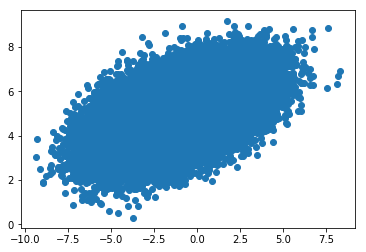

In [34]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

samplesource = multivariate_normal(mean=[5,-1], cov=[[1,0.5],[0.5,2]])

def p_ygivenx(x, m1, m2, s1, s2):
    return (random.normalvariate(m2 + rho * s2 / s1 * (x - m1), math.sqrt(1 - rho ** 2) * s2))

def p_xgiveny(y, m1, m2, s1, s2):
    return (random.normalvariate(m1 + rho * s1 / s2 * (y - m2), math.sqrt(1 - rho ** 2) * s1))

N = 5000
K = 20
x_res = []
y_res = []
z_res = []
m1 = 5
m2 = -1
s1 = 1
s2 = 2

rho = 0.5
y = m2

for i in range(N):
    for j in range(K):
        x = p_xgiveny(y, m1, m2, s1, s2)   #y给定得到x的采样
        y = p_ygivenx(x, m1, m2, s1, s2)   #x给定得到y的采样
        z = samplesource.pdf([x,y])
        x_res.append(x)
        y_res.append(y)
        z_res.append(z)

num_bins = 50
#plt.hist(x_res, num_bins, normed=1, facecolor='green', alpha=0.5,label='x')
#plt.hist(y_res, num_bins, normed=1, facecolor='red', alpha=0.5,label='y')
#plt.title('Histogram')
#plt.scatter(x_res,y_res)
plt.scatter(y_res,x_res)
#plt.legend()
plt.show()